In [16]:
# Import packages
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
# Print many statements at same time using the below command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [18]:
# Import datset and create a dataframe
cars=pd.read_csv("C:\\Users\\Ravi Kumar KM\\Downloads\\New folder\\cars.csv")
type(cars)
cars.head()
cars.tail()

pandas.core.frame.DataFrame

,Model,Actual_MPG,Cylinders,Engine_Disp,Horsepower,Weight,Accelerate,Year,Origin
0,amc ambassador dpl,15.0,8,390.0,190,3850,8.5,70,American
1,amc gremlin,21.0,6,199.0,90,2648,15.0,70,American
2,amc hornet,18.0,6,199.0,97,2774,15.5,70,American
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,American
4,buick estate wagon (sw),14.0,8,455.0,225,3086,10.0,70,American


,Model,Actual_MPG,Cylinders,Engine_Disp,Horsepower,Weight,Accelerate,Year,Origin
387,mazda glc custom,31.0,4,91.0,68,1970,17.6,82,Japanese
388,mazda glc custom l,37.0,4,91.0,68,2025,18.2,82,Japanese
389,nissan stanza xe,36.0,4,120.0,88,2160,14.5,82,Japanese
390,toyota celica gt,32.0,4,144.0,96,2665,13.9,82,Japanese
391,toyota corolla,34.0,4,108.0,70,2245,16.9,82,Japanese


In [19]:
cars.describe()

,Actual_MPG,Cylinders,Engine_Disp,Horsepower,Weight,Accelerate,Year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [20]:
cars1=cars.drop('Model',axis=1)
cars1.head()

,Actual_MPG,Cylinders,Engine_Disp,Horsepower,Weight,Accelerate,Year,Origin
0,15.0,8,390.0,190,3850,8.5,70,American
1,21.0,6,199.0,90,2648,15.0,70,American
2,18.0,6,199.0,97,2774,15.5,70,American
3,16.0,8,304.0,150,3433,12.0,70,American
4,14.0,8,455.0,225,3086,10.0,70,American


In [21]:
# Dummy coding cars
for col in cars1.columns:
    if cars1[col].dtype=='object':
        cars1[col]=pd.Categorical(cars1[col]).codes

In [22]:
cars1.head()

,Actual_MPG,Cylinders,Engine_Disp,Horsepower,Weight,Accelerate,Year,Origin
0,15.0,8,390.0,190,3850,8.5,70,0
1,21.0,6,199.0,90,2648,15.0,70,0
2,18.0,6,199.0,97,2774,15.5,70,0
3,16.0,8,304.0,150,3433,12.0,70,0
4,14.0,8,455.0,225,3086,10.0,70,0


In [23]:
#correlation Matrix
x=cars1.corr()
x

,Actual_MPG,Cylinders,Engine_Disp,Horsepower,Weight,Accelerate,Year,Origin
Actual_MPG,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
Cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
Engine_Disp,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
Horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
Weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
Accelerate,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
Year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
Origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


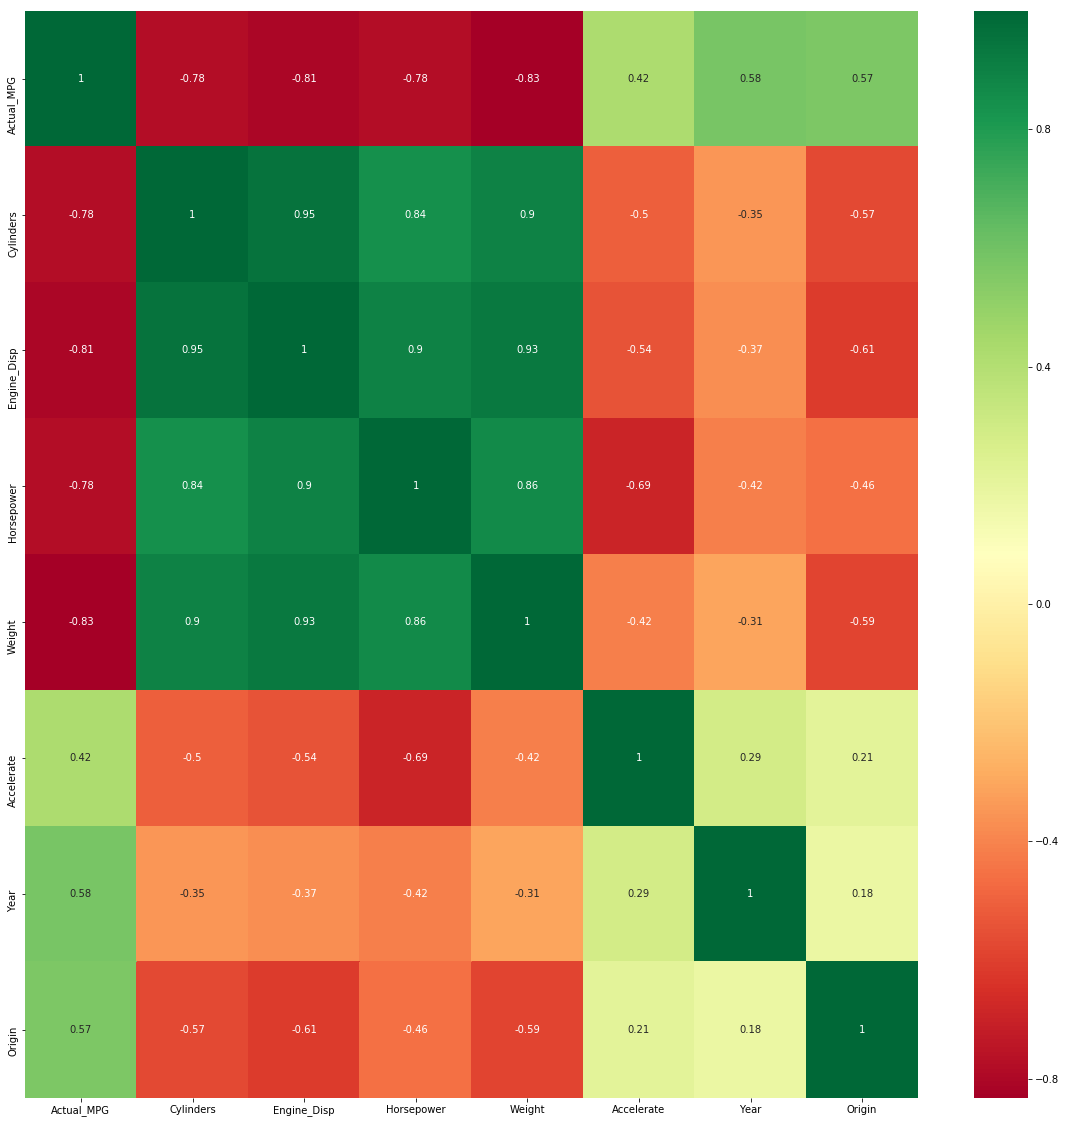

In [24]:
plt.subplots(figsize=(20,20))
sns.heatmap(x,cmap='RdYlGn',annot=True)
plt.show();

In [25]:
#Scale all values between 0 to 1
from sklearn.preprocessing import MinMaxScaler
scld=MinMaxScaler(feature_range=(0,1))
arr_scld=scld.fit_transform(cars1)
cars1_scld=pd.DataFrame(arr_scld,columns=cars1.columns)
cars1_scld.head()


,Actual_MPG,Cylinders,Engine_Disp,Horsepower,Weight,Accelerate,Year,Origin
0,0.159574,1.0,0.832041,0.782609,0.634250,0.029762,0.0,0.0
1,0.319149,0.6,0.338501,0.239130,0.293451,0.416667,0.0,0.0
2,0.239362,0.6,0.338501,0.277174,0.329175,0.446429,0.0,0.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0
4,0.132979,1.0,1.000000,0.972826,0.417635,0.119048,0.0,0.0


In [26]:
#Create features and labels on the normalized data
x = cars1_scld.drop('Actual_MPG',axis=1)
y = cars1_scld['Actual_MPG']
x.head()
y.head()


,Cylinders,Engine_Disp,Horsepower,Weight,Accelerate,Year,Origin
0,1.0,0.832041,0.782609,0.634250,0.029762,0.0,0.0
1,0.6,0.338501,0.239130,0.293451,0.416667,0.0,0.0
2,0.6,0.338501,0.277174,0.329175,0.446429,0.0,0.0
3,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0
4,1.0,1.000000,0.972826,0.417635,0.119048,0.0,0.0


0    0.159574
1    0.319149
2    0.239362
3    0.186170
4    0.132979
Name: Actual_MPG, dtype: float64

In [27]:
# Creating Features and Labels and running correlation Heat map
# create train and test data with 75% and 25% split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.35,random_state=1)
train_x.shape
test_x.shape
train_y.shape
test_y.shape

(254, 7)

(138, 7)

(254,)

(138,)

In [28]:
#let's import the regression object and define model
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
#Fir a model into train data
lm.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
#Evaluate the model
predict_test=lm.predict(test_x)

In [31]:
#R2 Value
print("RSquare Value for TEST data is-")
np.round(lm.score(test_x,test_y)*100,0)
print("RSquare Value for TRAIN data is-")
np.round(lm.score(train_x,train_y)*100,0)

RSquare Value for TEST data is-


83.0

RSquare Value for TRAIN data is-


81.0

In [32]:
# Predict on test and training data
predict_test=lm.predict(test_x)

In [33]:
#Print the loss Function-MSE
import numpy as np
from sklearn import metrics
print ("Mean Square Error(MSE)for TEST data is")
np.round(metrics.mean_squared_error(test_y,predict_test),0)

Mean Square Error(MSE)for TEST data is


0.0

In [34]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error(MAE) for TEST data is")
np.round(mean_absolute_error(test_y,predict_test),0)

Mean Absolute Error(MAE) for TEST data is


0.0

In [35]:
#Append Data
fdf=pd.concat([test_x,test_y],1)
fdf['Predicted']=np.round(predict_test,1)
fdf['Prediction_Error']=fdf['Actual_MPG']-fdf['Predicted']
fdf

,Cylinders,Engine_Disp,Horsepower,Weight,Accelerate,Year,Origin,Actual_MPG,Predicted,Prediction_Error
81,0.2,0.074935,0.228261,0.138078,0.505952,0.166667,1.0,0.478723,0.5,-0.021277
165,0.6,0.405685,0.266304,0.615821,0.654762,0.416667,0.0,0.239362,0.2,0.039362
351,0.2,0.043928,0.103261,0.102637,0.678571,0.916667,1.0,0.744681,0.7,0.044681
119,0.2,0.136951,0.358696,0.355826,0.446429,0.250000,0.5,0.265957,0.3,-0.034043
379,0.2,0.113695,0.211957,0.272753,0.488095,1.000000,0.0,0.585106,0.5,0.085106
236,0.6,0.201550,0.277174,0.340800,0.386905,0.583333,1.0,0.345745,0.5,-0.154255
78,0.2,0.136951,0.358696,0.374256,0.386905,0.166667,0.5,0.239362,0.3,-0.060638
92,1.0,0.728682,0.538043,0.673377,0.297619,0.250000,0.0,0.106383,0.2,-0.093617
80,0.0,0.005168,0.277174,0.203289,0.327381,0.166667,1.0,0.265957,0.4,-0.134043
333,0.2,0.170543,0.239130,0.311313,0.446429,0.833333,1.0,0.553191,0.6,-0.046809


In [36]:
fdf.head()

,Cylinders,Engine_Disp,Horsepower,Weight,Accelerate,Year,Origin,Actual_MPG,Predicted,Prediction_Error
81,0.2,0.074935,0.228261,0.138078,0.505952,0.166667,1.0,0.478723,0.5,-0.021277
165,0.6,0.405685,0.266304,0.615821,0.654762,0.416667,0.0,0.239362,0.2,0.039362
351,0.2,0.043928,0.103261,0.102637,0.678571,0.916667,1.0,0.744681,0.7,0.044681
119,0.2,0.136951,0.358696,0.355826,0.446429,0.250000,0.5,0.265957,0.3,-0.034043
379,0.2,0.113695,0.211957,0.272753,0.488095,1.000000,0.0,0.585106,0.5,0.085106


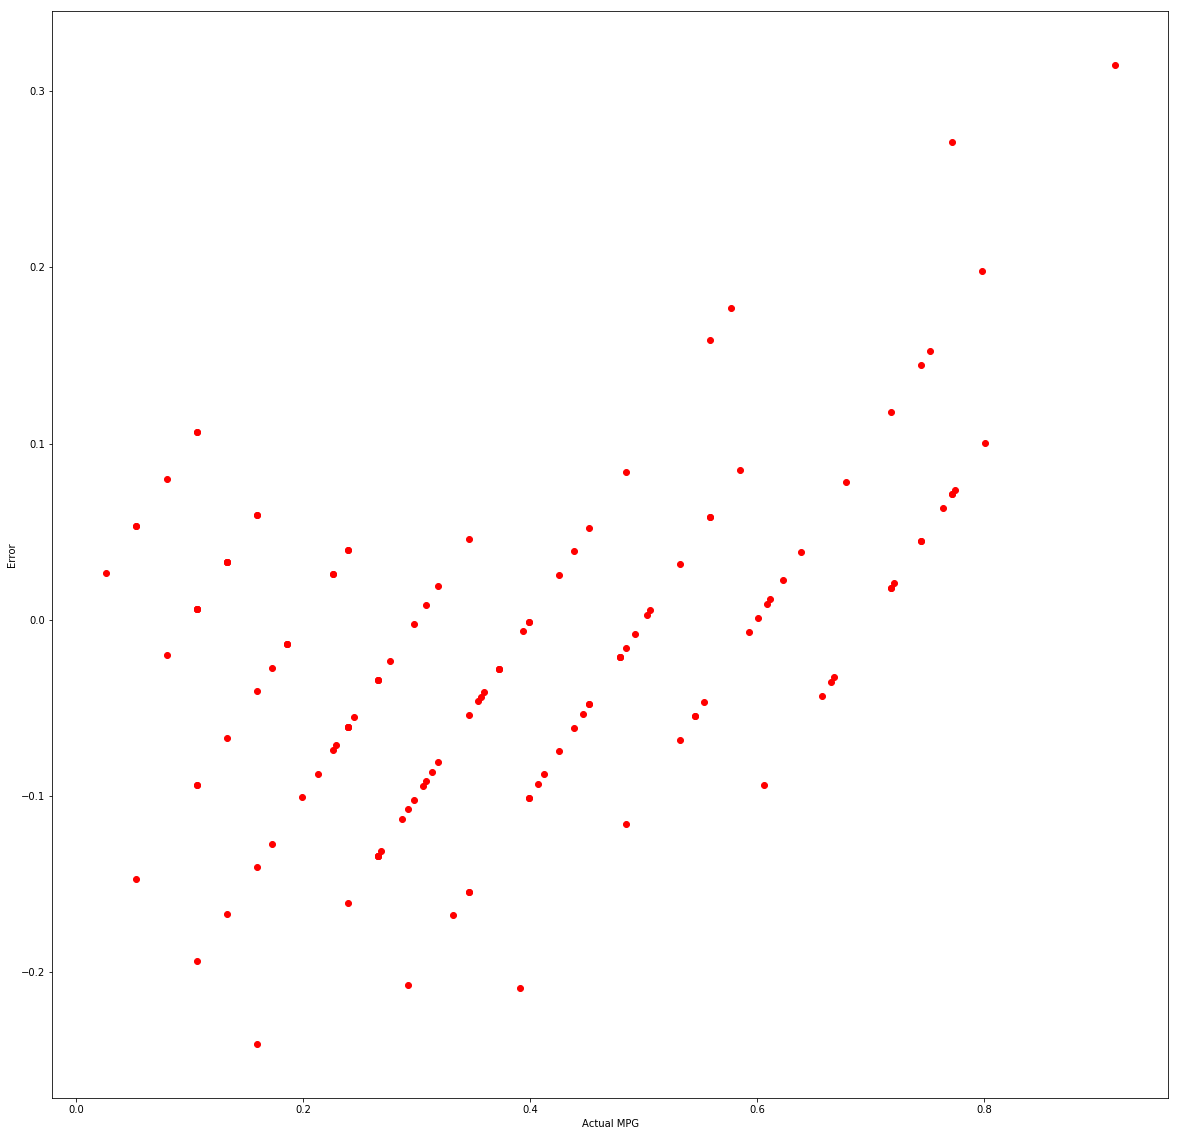

In [37]:
plt.subplots(figsize=(20,20))
plt.scatter(fdf.Actual_MPG,fdf.Prediction_Error,color='red')
plt.xlabel('Actual MPG')
plt.ylabel("Error")
plt.show();

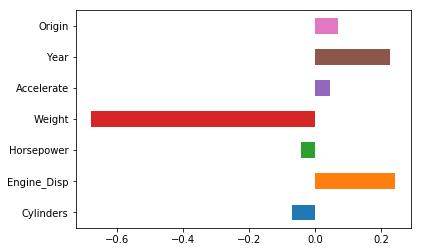

In [38]:
ft_importances =pd.Series(lm.coef_,index=x.columns)
ft_importances.plot(kind='barh')
plt.show();